Random Forest
=======

In [1]:
# remove warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt; plt.style.use("ggplot")

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_fscore_support, auc, accuracy_score

In [2]:
data = pd.read_csv("../data/loans_sample_processed.csv", sep = "^").sample(100000, random_state = 4290)

In [3]:
data.head()

,funded_amnt_inv,installment,int_rate,annual_inc,dti,total_rec_late_fee,total_acc,manager,refinance,term_ 36 months,...,emp_length_< 1 year,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,application_type_Individual,application_type_Joint App,non_payment
337231,15000.0,555.32,19.72,55000.00,15.77,0.0,47.0,0,1,1,...,0,0,0,0,0,0,1,1,0,0
556157,15400.0,515.12,12.49,110000.00,10.19,0.0,26.0,0,1,1,...,0,0,0,0,0,0,1,1,0,0
580514,15000.0,501.74,12.49,44275.82,13.93,0.0,17.0,0,1,1,...,0,0,0,0,0,0,1,1,0,1
446532,12000.0,377.09,8.19,69000.00,19.63,0.0,19.0,0,1,1,...,0,0,0,0,0,0,1,1,0,0
95642,2300.0,78.60,13.99,30000.00,18.68,0.0,11.0,1,1,1,...,0,0,0,0,0,0,1,1,0,0


In [4]:
data.shape

(100000, 38)

In [5]:
#data = pd.concat([data[data['non_payment']==0].sample(20000), data[data['non_payment']==1].sample(20000)], axis = 0).sort_index()

__Train / Test split:__

In [6]:
X = data.loc[:, data.columns!='non_payment']

In [7]:
y = data['non_payment']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4290)

__Prior__:

In [9]:
y.value_counts()[0] / len(y)

0.79388

__Random Forest__:

In [10]:
random_forest = RandomForestClassifier()

Grid Parameters:

In [11]:
rf_param_grid = {"max_depth": [10,50,100,500,1000],
                 "min_samples_leaf": [10,50,100,500,1000],
                 "n_estimators" :[10,50,100,500,1000]}

Cross validate model with Kfold stratified cross val

In [12]:
kfold = StratifiedKFold(n_splits=3)

In [13]:
gsRFC = GridSearchCV(random_forest, param_grid = rf_param_grid, cv = kfold, scoring = "roc_auc", n_jobs= 2, verbose = 1)

In [14]:
gsRFC.fit(X_train,y_train)

Fitting 3 folds for each of 125 candidates, totalling 375 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 11.5min
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed: 52.4min
[Parallel(n_jobs=2)]: Done 375 out of 375 | elapsed: 109.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'max_depth': [10, 50, 100, 500, 1000], 'min_samples_leaf': [10, 50, 100, 500, 1000], 'n_estimators': [10, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [15]:
gsRFC.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
gsRFC.best_score_

0.7235172855655084

Feature importance:

Text(0.5,1,'Feature importance')

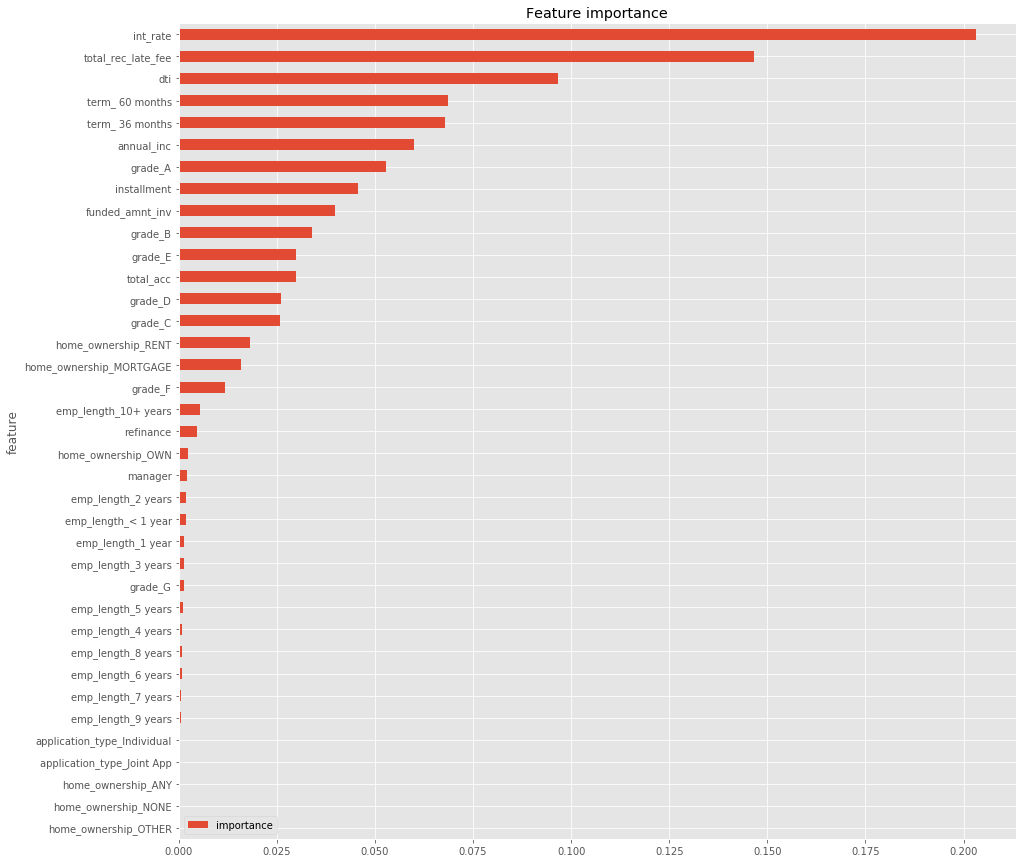

In [17]:
features = pd.DataFrame({'feature':X_train.columns,
                         'importance':gsRFC.best_estimator_.feature_importances_})

features = features.set_index('feature').sort_values('importance', ascending=True)

features.plot(kind='barh',figsize=(15,15)).set_title('Feature importance')

In [31]:
random_forest = RandomForestClassifier(max_depth=50, n_estimators=1000,  min_samples_leaf=50)

In [32]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

__Model Evaluation__

AUC in the train set:

In [33]:
y_scores_train = random_forest.predict_proba(X_train)

y_scores_train = pd.DataFrame(y_scores_train).loc[:,1]

In [34]:
roc_auc_score(y_train, y_scores_train)

0.7627762443408312

ROC Curve:

In [35]:
y_scores = random_forest.predict_proba(X_test)

y_scores = pd.DataFrame(y_scores).loc[:,1]

In [36]:
fpr, tpr, _ = roc_curve(y_test, y_scores)

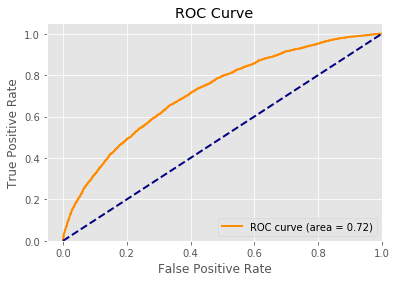

In [37]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

AUC:

In [38]:
roc_auc_score(y_test, y_scores)

0.7192410652563164

Confusion Matrix

In [39]:
y_predictions = gsRFC.best_estimator_.predict(X_test)

In [40]:
confusion_matrix(y_test, y_predictions)

array([[15639,   205],
       [ 3823,   333]])

Accuracy:

In [41]:
accuracy_score(y_test, y_predictions)

0.7986

Recall:

In [42]:
precision_recall_fscore_support(y_test, y_predictions) [0]

array([0.80356592, 0.61895911])

Precision:

In [43]:
precision_recall_fscore_support(y_test, y_predictions) [1]

array([0.98706135, 0.08012512])

__Output__:

In [52]:
y_scores_train.to_csv("../output/y_scores_train_rf.csv", sep = "^", index = False)
y_scores.to_csv("../output/y_scores_test_rf.csv", sep = "^", index = False)